In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

!pip install hurst

from hurst import compute_Hc


In [44]:
# generate random walk process
np.random.seed(112)
F = [15]
for i in range(252):
    F.append(F[i] + np.random.randn())
F = np.array(F)

# generate price series
P_a = 1.5*F + np.random.randn(len(F))
P_b = 0.5*F + np.random.randn(len(F))

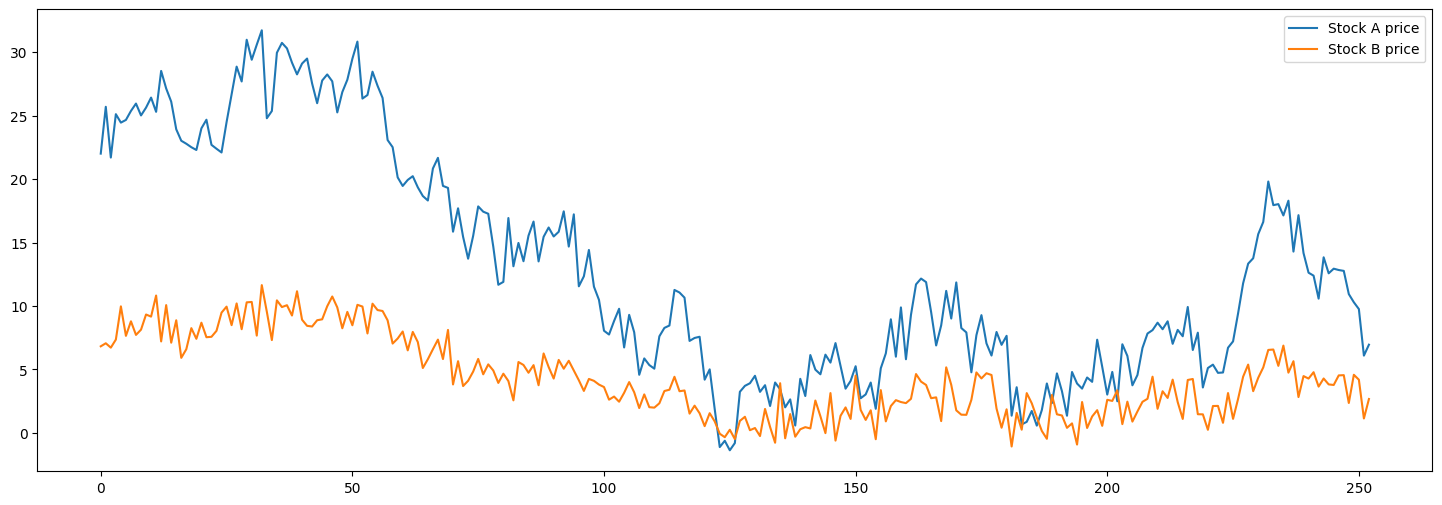

In [45]:
# plot prices
plt.figure(figsize=(18,6))
plt.plot(P_a, label='Stock A price')
plt.plot(P_b, label='Stock B price')
plt.legend()

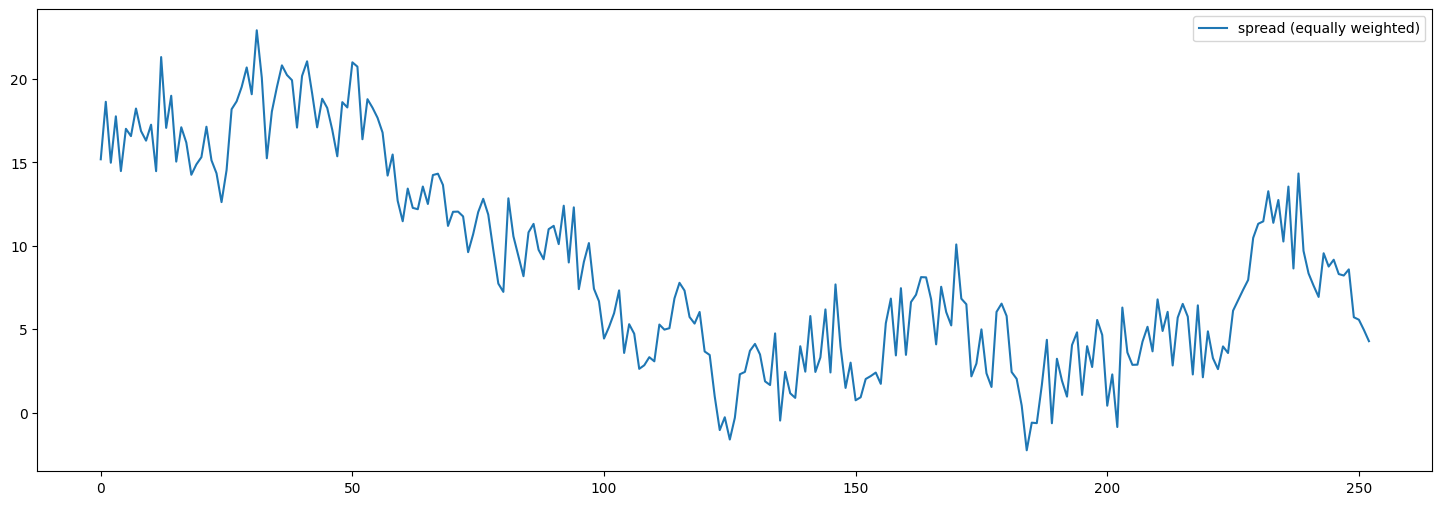

In [46]:
# plot spread (equally weighted positions)
spread_ew = P_a - P_b
plt.figure(figsize=(18,6))
plt.plot(spread_ew, label='spread (equally weighted)')
plt.legend()

In [47]:
from statsmodels.regression.linear_model import OLS

# calculate hedge ratio
res = OLS(P_a, P_b).fit()
hedge_ratio = res.params[0]

# create portfolio using calculated ratio
spread_hr = P_a - hedge_ratio*P_b

plt.figure(figsize=(18,6))
plt.plot(spread_hr, label='spread (hedge ratio)')
plt.legend()

In [48]:
from statsmodels.tsa.stattools import coint

coint(P_a, P_b)

(-5.995727015051182,
 1.6583137677940785e-06,
 array([-3.94042787, -3.36048387, -3.06132299]))

In [49]:
prices = pd.read_csv('final_data_norm.csv', parse_dates=['Timestamp'], index_col='Timestamp')

prices = prices.apply(lambda col: col.abs() if col.name != 'Timestamp' else col)
prices

Instr1    Instr2    Instr3    Instr4    Instr5    Instr6  \
Timestamp                                                                
2016-03-11  1.416659  1.420558  1.426727  1.426903  1.424853  1.421595   
2016-03-14  1.462301  1.472009  1.482483  1.486425  1.485694  1.483600   
2016-03-15  1.504228  1.514607  1.527892  1.535233  1.535472  1.533584   
2016-03-16  1.419844  1.426643  1.440522  1.448331  1.447591  1.444372   
2016-03-17  1.355626  1.360255  1.373846  1.382261  1.383064  1.381734   
...              ...       ...       ...       ...       ...       ...   
2023-11-30  0.835726  0.779651  0.811547  0.839093  0.864957  0.887792   
2023-12-01  0.626091  0.664025  0.698311  0.730168  0.758640  0.782129   
2023-12-04  0.580980  0.625299  0.666123  0.703383  0.737745  0.766944   
2023-12-05  0.536930  0.575508  0.610367  0.642671  0.673832  0.700510   
2023-12-06  0.447238  0.486437  0.519548  0.551008  0.580420  0.607502   

              Instr7    Instr8    Instr9   Instr10   Instr11   Instr12  \
Timestamp                                                                
2016-03-11  1.414042  1.403588  1.393133  1.382952  1.372094  1.360408   
2016-03-14  1.477712  1.468183  1.459244  1.449825  1.439647  1.429297   
2016-03-15  1.527089  1.517461  1.508316  1.499284  1.488712  1.477881   
2016-03-16  1.437431  1.428227  1.419032  1.410119  1.399115  1.387963   
2016-03-17  1.377009  1.370292  1.363145  1.355088  1.345784  1.335752   
...              ...       ...       ...       ...       ...       ...   
2023-11-30  0.908630  0.926472  0.941884  0.955530  0.966677  0.975294   
2023-12-01  0.802080  0.818593  0.833516  0.846164  0.856458  0.865071   
2023-12-04  0.791685  0.813265  0.831472  0.846861  0.859302  0.869422   
2023-12-05  0.722817  0.742677  0.761271  0.776504  0.789616  0.800533   
2023-12-06  0.628610  0.646785  0.662445  0.681070  0.692908  0.701188   

             Instr13   Instr14   Instr15   Instr16   Instr17   Instr18  \
Timestamp                                                                
2016-03-11  1.351622  1.343384  1.333519  1.325976  1.319087  1.313109   
2016-03-14  1.421079  1.414141  1.405593  1.398603  1.393041  1.387593   
2016-03-15  1.469107  1.461563  1.452365  1.444678  1.438367  1.432122   
2016-03-16  1.378961  1.370482  1.361888  1.354871  1.348509  1.342255   
2016-03-17  1.327977  1.320802  1.312817  1.306453  1.301592  1.296917   
...              ...       ...       ...       ...       ...       ...   
2023-11-30  0.981823  0.989337  0.998928  1.007441  1.015631  1.022611   
2023-12-01  0.871727  0.881696  0.890817  0.898892  0.907484  0.914124   
2023-12-04  0.879116  0.890729  0.900785  0.910606  0.919412  0.927077   
2023-12-05  0.811138  0.822983  0.834077  0.844227  0.852615  0.859880   
2023-12-06  0.720253       NaN       NaN  0.803619  0.751624       NaN   

             Instr19   Instr20  
Timestamp                       
2016-03-11  1.309208  1.306107  
2016-03-14  1.384227  1.381651  
2016-03-15  1.427919  1.425299  
2016-03-16  1.338886  1.336325  
2016-03-17  1.294369  1.292677  
...              ...       ...  
2023-11-30  1.028738  1.034918  
2023-12-01  0.920744  0.929995  
2023-12-04  0.934759  0.945104  
2023-12-05  0.867984  0.878793  
2023-12-06       NaN       NaN  

[2000 rows x 20 columns]

In [50]:
cumret = np.log(prices).diff().cumsum()+1 # calculate cumulative returns
cumret.dropna(inplace=True)

In [51]:
def parse_pair(pair):
    '''
    parse pair string S1-S2
    return tickers S1, S2
    '''
    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]

    return s1,s2

def cadf_pvalue(s1, s2, cumret):
    '''
    perform CADF cointegration tests
    since it is sensitive to the order of stocks in the pair, perform both tests (s1-2 and s2-s1)
    return the smallest p-value of two tests
    '''
    from statsmodels.tsa.stattools import coint

    p1 = coint(cumret[s1], cumret[s2])[1]
    p2 = coint(cumret[s2], cumret[s1])[1]

    return min(p1,p2)

def calculate_halflife(spread):
    '''
    calculate half-life of mean reversion of the spread
    '''
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant

    ylag = spread.shift()
    deltay = spread - ylag
    ylag.dropna(inplace=True)
    deltay.dropna(inplace=True)

    res = OLS(deltay, add_constant(ylag)).fit()
    halflife = -np.log(2)/res.params[0]

    return halflife
def calculate_metrics(pairs, cumret, pairs_df):
    '''
    calculate metrics for pairs using data in cumret
    return dataframe of results
    '''
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from statsmodels.tsa.stattools import coint

    cols = ['Distance', 'CADF p-value', 'ADF p-value', 'Spread SD', 'Pearson r',
        'Num zero-crossings', 'Hurst Exponent', 'Half-life of mean reversion', '% days within historical 2-SD band']
    results = pd.DataFrame(index=pairs, columns=cols)

    for pair in pairs:
        s1,s2 = parse_pair(pair)
        hedge_ratio = pairs_df.loc[pair]['Hedge ratio']
        spread = cumret[s1] - hedge_ratio*cumret[s2]
        results.loc[pair]['CADF p-value'] = coint(cumret[s1], cumret[s2])[1]
        results.loc[pair]['ADF p-value'] = adfuller(spread)[1]
        hist_mu = pairs_df.loc[pair]['Spread mean'] # historical mean
        hist_sd = pairs_df.loc[pair]['Spread SD'] # historical standard deviation
        results.loc[pair]['Spread SD'] = hist_sd
        results.loc[pair]['Pearson r'] = np.corrcoef(cumret[s1], cumret[s2])[0][1]
        # subtract the mean to calculate distances and num_crossings
        spread_nm = spread - hist_mu
        results.loc[pair]['Distance'] = np.sqrt(np.sum((spread_nm)**2))
        results.loc[pair]['Num zero-crossings'] = ((spread_nm[1:].values * spread_nm[:-1].values) < 0).sum()
        results.loc[pair]['Hurst Exponent'] = compute_Hc(spread)[0]
        results.loc[pair]['Half-life of mean reversion'] = calculate_halflife(spread)
        results.loc[pair]['% days within historical 2-SD band'] = (abs(spread-hist_mu) < 2*hist_sd).sum() / len(spread) * 100

    return results
def plot_pairs(pairs, cumret_train, cumret_test):
    '''
    plot cumulative returns of the spread for each pair in pairs
    '''

    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant

    for pair in pairs:
        s1,s2 = parse_pair(pair)
        res = OLS(cumret_train[s1], add_constant(cumret_train[s2])).fit()
        spread_train = cumret_train[s1] - res.params[s2]*cumret_train[s2]
        spread_test = cumret_test[s1] - res.params[s2]*cumret_test[s2]
        spread_mean = spread_train.mean() # historical mean
        spread_std = spread_train.std() # historical standard deviation

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))
        fig.suptitle(f'Spread of {pair} pair', fontsize=16)
        ax1.plot(spread_train, label='spread')
        ax1.set_title('Formation period')
        ax1.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax1.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax1.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax1.legend()
        ax2.plot(spread_test, label='spread')
        ax2.set_title('Trading period')
        ax2.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax2.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax2.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax2.legend()

def select_pairs(train):
    '''
    select pairs using data from train dataframe
    return dataframe of selected pairs
     '''
    tested = []

    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.stattools import coint

    cols = ['Distance', 'Num zero-crossings', 'Pearson r', 'Spread mean',
            'Spread SD', 'Hurst Exponent', 'Half-life of mean reversion', 'Hedge ratio']
    pairs = pd.DataFrame(columns=cols)

    for s1 in train.columns:
        for s2 in train.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in tested):
                tested.append(f'{s1}-{s2}')
                cadf_p = coint(train[s1], train[s2])[1]
                if cadf_p<0.01 and (f'{s2}-{s1}' not in pairs.index): # stop if pair already added as s2-s1
                    res = OLS(train[s1], add_constant(train[s2])).fit()
                    hedge_ratio = res.params[s2]
                    if hedge_ratio > 0: # hedge ratio should be posititve
                        spread = train[s1] - hedge_ratio*train[s2]
                        hurst = compute_Hc(spread)[0]
                        if hurst<0.5:
                            halflife = calculate_halflife(spread)
                            if halflife>1 and halflife<30:
                                # subtract the mean to calculate distances and num_crossings
                                spread_nm = spread - spread.mean()
                                num_crossings = (spread_nm.values[1:] * spread_nm.values[:-1] < 0).sum()
                                if num_crossings>len(train.index)/252*12:
                                    distance = np.sqrt(np.sum(spread_nm**2))
                                    pearson_r = np.corrcoef(train[s1], train[s2])[0][1]
                                    pairs.loc[f'{s1}-{s2}'] = [distance, num_crossings, pearson_r, spread.mean(),
                                                               spread.std(), hurst, halflife, hedge_ratio]

    return pairs

In [52]:
# prepare data
cumret12_6 = cumret.loc['2017-03-12':]
cumret12_6 = cumret12_6 / cumret12_6.iloc[0] # divide by first row so that all prices start at 1
train12_6 = cumret12_6.loc['2017-04-12':'2020-04-12'] # formation period
test12_6 = cumret12_6.loc['2021-12-05':'2022-06-06'] # trading period

In [53]:
pairs12_6 = select_pairs(train12_6)
pairs12_6

Distance  Num zero-crossings  Pearson r  Spread mean  \
Instr1-Instr2    22.734448                74.0   0.940237    -0.129409   
Instr1-Instr3    27.175717                72.0   0.913410    -0.207321   
Instr1-Instr4    30.967847                62.0   0.885919    -0.287754   
Instr1-Instr5    31.687022                72.0   0.880195    -0.323649   
Instr1-Instr6    36.071090                64.0   0.841487    -0.418543   
...                    ...                 ...        ...          ...   
Instr13-Instr15   9.859222                54.0   0.978032    -0.046010   
Instr13-Instr16  11.317555                58.0   0.970948    -0.059708   
Instr13-Instr20  22.297421                60.0   0.881898    -0.137925   
Instr15-Instr20  20.196279                60.0   0.901283    -0.092811   
Instr16-Instr20  16.854941                64.0   0.928437    -0.068944   

                 Spread SD  Hurst Exponent  Half-life of mean reversion  \
Instr1-Instr2     0.818231        0.397753                     1.230302   
Instr1-Instr3     0.978075        0.336569                     1.167563   
Instr1-Instr4     1.114557        0.344127                     1.219133   
Instr1-Instr5     1.140441        0.334203                     1.420725   
Instr1-Instr6     1.298227        0.372439                     1.398785   
...                    ...             ...                          ...   
Instr13-Instr15   0.354841        0.349927                     1.034033   
Instr13-Instr16   0.407328        0.296080                     1.040306   
Instr13-Instr20   0.802502        0.274396                     1.053289   
Instr15-Instr20   0.726880        0.297034                     1.024398   
Instr16-Instr20   0.606623        0.262813                     1.021387   

                 Hedge ratio  
Instr1-Instr2       0.961686  
Instr1-Instr3       0.937790  
Instr1-Instr4       0.913690  
Instr1-Instr5       0.955983  
Instr1-Instr6       0.908372  
...                      ...  
Instr13-Instr15     0.992269  
Instr13-Instr16     1.012146  
Instr13-Instr20     0.877671  
Instr15-Instr20     0.884092  
Instr16-Instr20     0.886377  

[132 rows x 8 columns]

In [54]:
pairs12_6.sort_values(by='Distance')  #shortest distance

Distance  Num zero-crossings  Pearson r  Spread mean  \
Instr13-Instr15   9.859222                54.0   0.978032    -0.046010   
Instr13-Instr16  11.317555                58.0   0.970948    -0.059708   
Instr12-Instr15  13.667358                56.0   0.959368    -0.075489   
Instr12-Instr16  14.974443                62.0   0.951016    -0.089929   
Instr2-Instr3    16.114040                54.0   0.969050    -0.083705   
...                    ...                 ...        ...          ...   
Instr2-Instr19   50.302561                48.0   0.637287    -0.773548   
Instr2-Instr20   51.189313                50.0   0.620494    -0.792655   
Instr1-Instr18   52.834832                42.0   0.611340    -0.864496   
Instr1-Instr19   53.391280                40.0   0.600397    -0.872574   
Instr1-Instr20   54.224687                42.0   0.583400    -0.891702   

                 Spread SD  Hurst Exponent  Half-life of mean reversion  \
Instr13-Instr15   0.354841        0.349927                     1.034033   
Instr13-Instr16   0.407328        0.296080                     1.040306   
Instr12-Instr15   0.491899        0.348792                     1.143689   
Instr12-Instr16   0.538942        0.312635                     1.239303   
Instr2-Instr3     0.579957        0.339443                     1.025671   
...                    ...             ...                          ...   
Instr2-Instr19    1.810429        0.287415                     2.387045   
Instr2-Instr20    1.842344        0.295554                     2.470532   
Instr1-Instr18    1.901567        0.325120                     2.290137   
Instr1-Instr19    1.921594        0.301962                     2.305826   
Instr1-Instr20    1.951589        0.308515                     2.375702   

                 Hedge ratio  
Instr13-Instr15     0.992269  
Instr13-Instr16     1.012146  
Instr12-Instr15     0.996840  
Instr12-Instr16     1.015310  
Instr2-Instr3       0.972726  
...                      ...  
Instr2-Instr19      0.875029  
Instr2-Instr20      0.852253  
Instr1-Instr18      0.839980  
Instr1-Instr19      0.843182  
Instr1-Instr20      0.819583  

[132 rows x 8 columns]

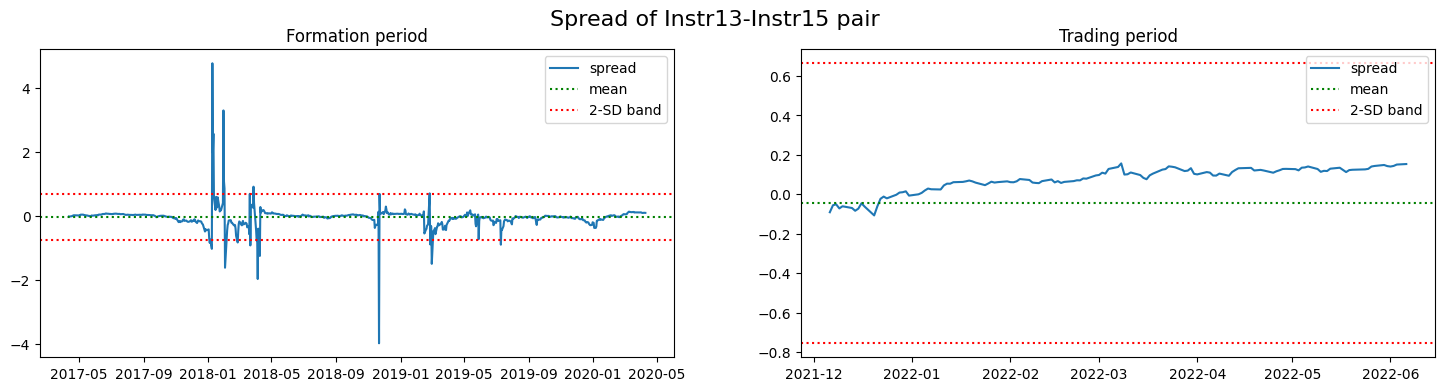

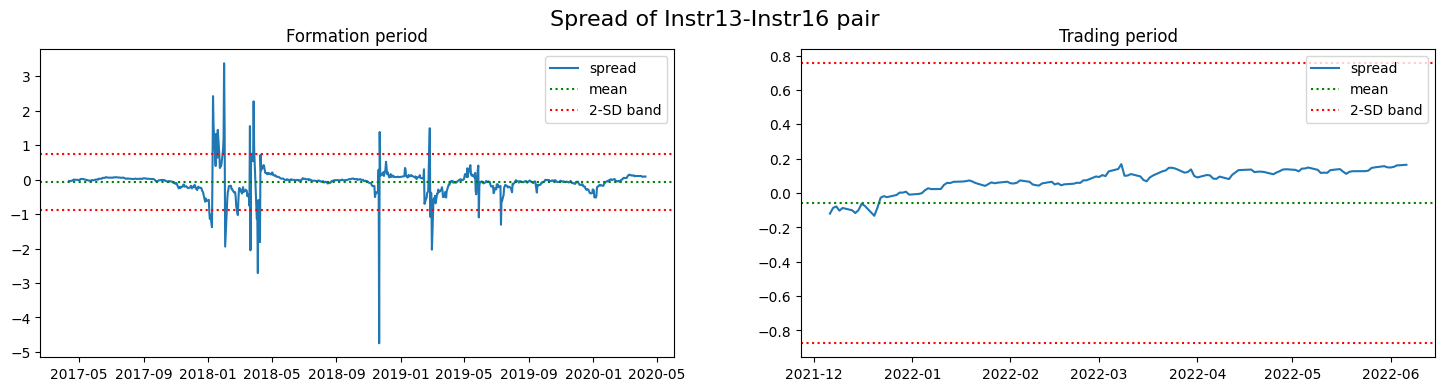

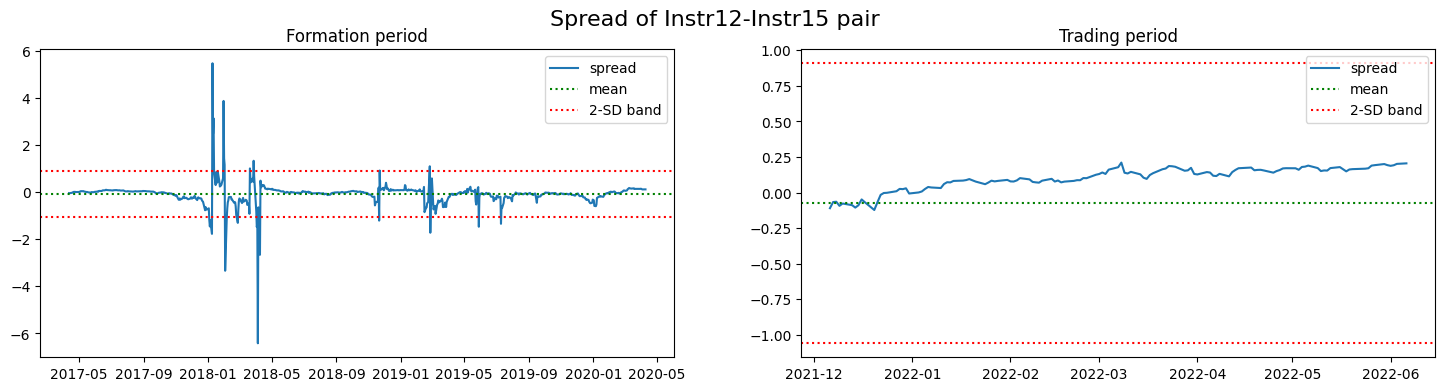

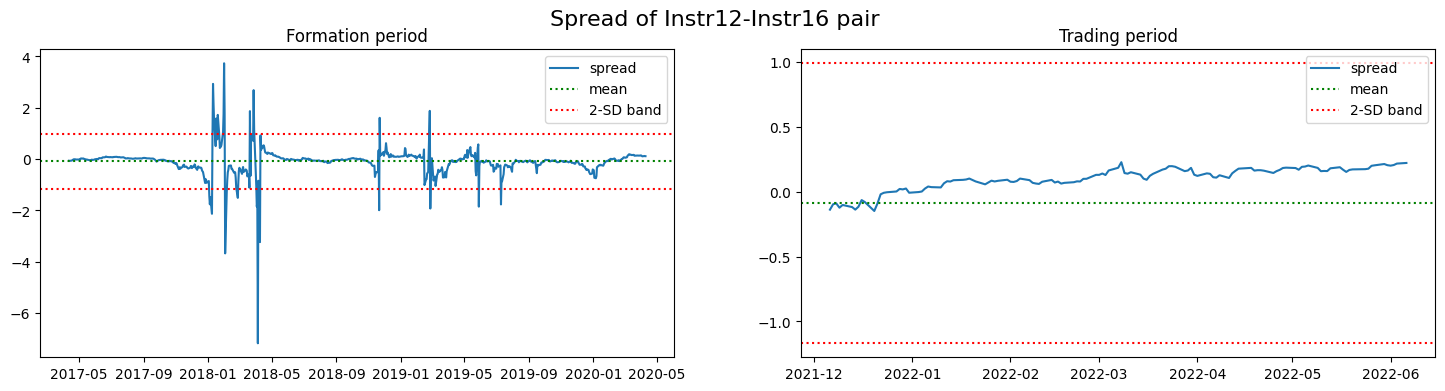

In [55]:
top5_distance = list(pairs12_6.sort_values(by='Distance').index[:5])
plot_pairs(top5_distance, train12_6, test12_6)

In [56]:
pairs12_6.sort_values(by='Num zero-crossings', ascending=False)

Distance  Num zero-crossings  Pearson r  Spread mean  \
Instr1-Instr2   22.734448                74.0   0.940237    -0.129409   
Instr1-Instr3   27.175717                72.0   0.913410    -0.207321   
Instr1-Instr5   31.687022                72.0   0.880195    -0.323649   
Instr3-Instr7   26.322009                72.0   0.914415    -0.261800   
Instr3-Instr6   25.275513                68.0   0.921371    -0.225127   
...                   ...                 ...        ...          ...   
Instr6-Instr12  26.924617                40.0   0.900268    -0.279770   
Instr1-Instr19  53.391280                40.0   0.600397    -0.872574   
Instr6-Instr14  32.138040                40.0   0.854391    -0.355269   
Instr8-Instr16  27.913756                40.0   0.867745    -0.280012   
Instr4-Instr17  42.871527                38.0   0.749269    -0.577360   

                Spread SD  Hurst Exponent  Half-life of mean reversion  \
Instr1-Instr2    0.818231        0.397753                     1.230302   
Instr1-Instr3    0.978075        0.336569                     1.167563   
Instr1-Instr5    1.140441        0.334203                     1.420725   
Instr3-Instr7    0.947350        0.280331                     1.137535   
Instr3-Instr6    0.909686        0.318621                     1.124130   
...                   ...             ...                          ...   
Instr6-Instr12   0.969038        0.299540                     1.056542   
Instr1-Instr19   1.921594        0.301962                     2.305826   
Instr6-Instr14   1.156673        0.298932                     1.212673   
Instr8-Instr16   1.004638        0.267351                     1.853220   
Instr4-Instr17   1.542980        0.234154                     1.725385   

                Hedge ratio  
Instr1-Instr2      0.961686  
Instr1-Instr3      0.937790  
Instr1-Instr5      0.955983  
Instr3-Instr7      1.013378  
Instr3-Instr6      0.968748  
...                     ...  
Instr6-Instr12     1.149490  
Instr1-Instr19     0.843182  
Instr6-Instr14     1.118637  
Instr8-Instr16     1.074147  
Instr4-Instr17     1.063248  

[132 rows x 8 columns]